<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Clasificacion-Linear/blob/main/4_Clasificaci%C3%B3n_KNN(Los_Ping%C3%BCinos_Regresan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
3,0,Torgersen,NaN,NaN,NaN,NaN,NaN
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,2,Biscoe,NaN,NaN,NaN,NaN,NaN
340,2,Biscoe,46.8,14.3,215.0,4850.0,Female
341,2,Biscoe,50.4,15.7,222.0,5750.0,Male
342,2,Biscoe,45.2,14.8,212.0,5200.0,Female


In [14]:
df.dropna(inplace=True)
df.drop(["island", "sex"], axis=1, inplace=True)
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


# Exploración de Datos

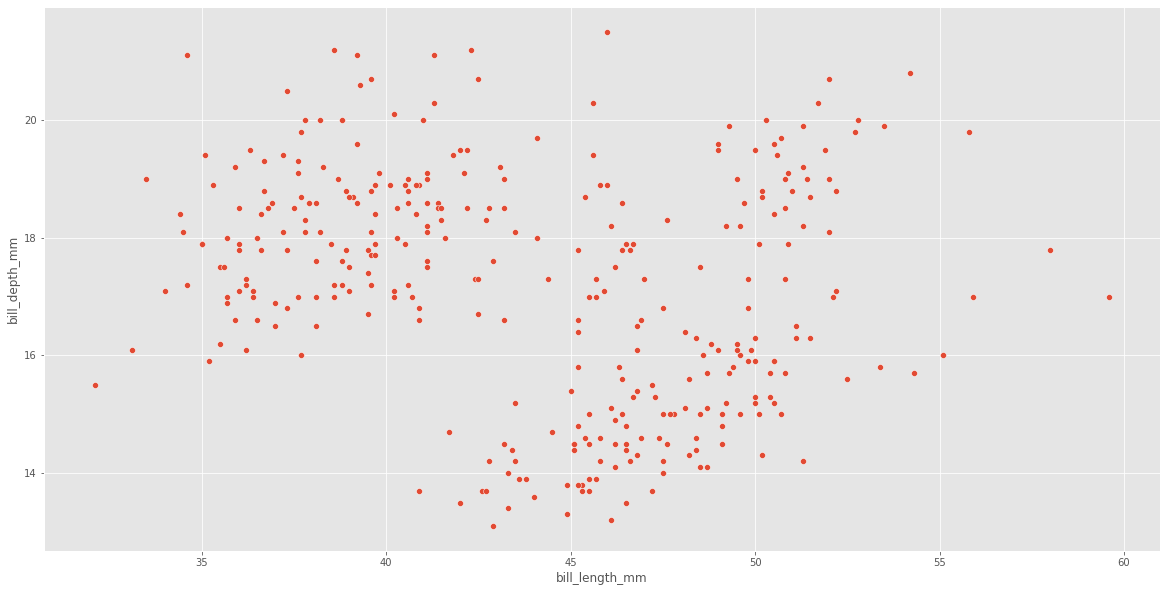

In [15]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm")

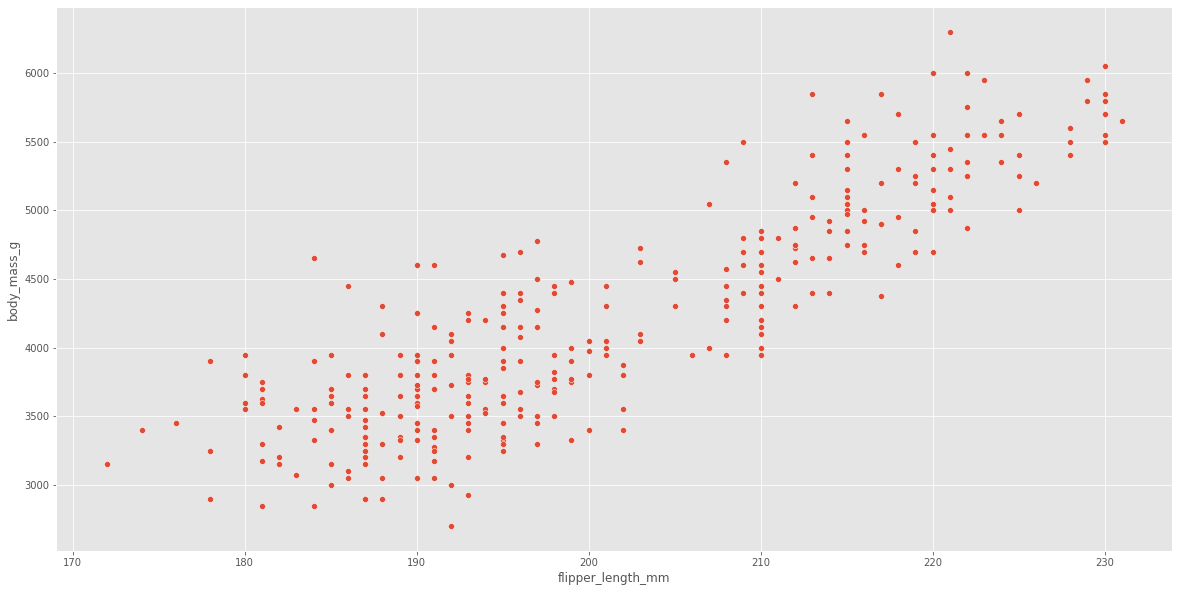

In [16]:
sns.scatterplot(data=df, x="flipper_length_mm", y="body_mass_g")

# KNN

In [17]:
X = df.drop(["species"], axis=1)
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [18]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8059701492537313

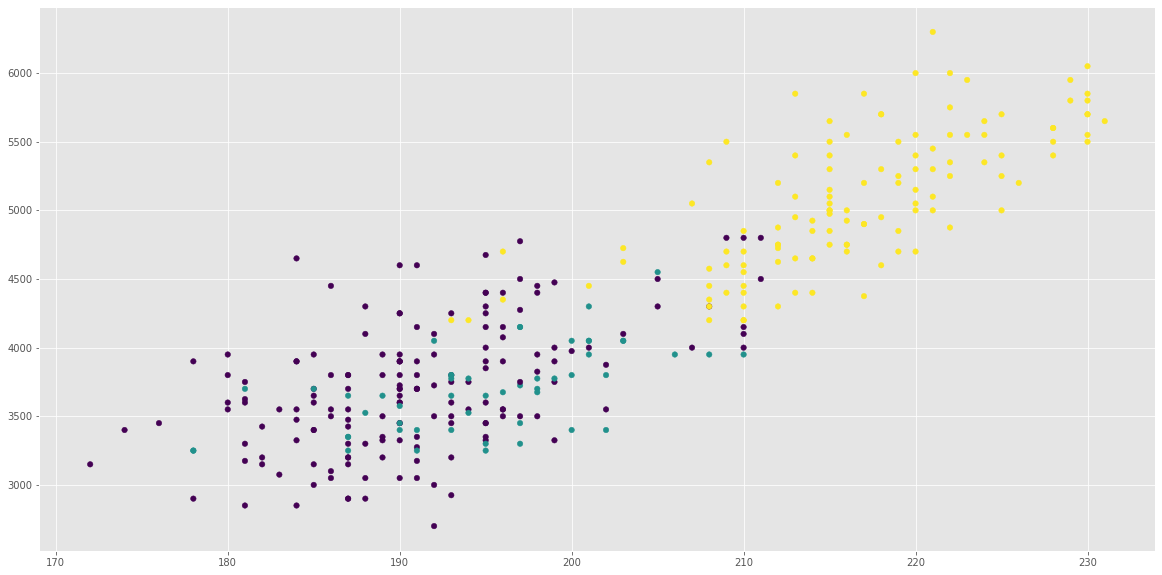

In [19]:
y_labels = clf.predict(X)
plt.scatter(df["flipper_length_mm"], df["body_mass_g"], c = y_labels, s = 30)